In [ ]:
# JD: -10 for not following instructions (using manual labels?)

In [10]:
## THIS CELL IS DONE FOR YOU

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Load the data
health_data=pd.read_csv('healthcare-dataset-stroke-data.csv') # csv file must be in the same directory as the notebook

# We need to perform some preprocessing to remove missing values and encode categorical variables
impute= SimpleImputer(missing_values=np.nan, strategy='median')
health_data['bmi']=pd.DataFrame(impute.fit_transform(np.array(health_data['bmi']).reshape(-1, 1)))
OH=OneHotEncoder()
for col in health_data.select_dtypes(include=['object']):
  health_data[col]=OH.fit_transform(health_data[[col]]).toarray()

# Separate the features and the target
X = health_data.drop('stroke', axis=1).values  # features
y = health_data['stroke'].values # targets

# Scale the features to have zero mean and unit variance -- this helps gradient descent converge faster
X = StandardScaler().fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Generate the predicted _probabilities_ on the test set
y_pred_probs = clf.predict_proba(X_test)[:, 1]  # probability of the positive class

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
# Load the data
health_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Define X and y again if needed
X = health_data.drop('stroke', axis=1).values  # features
y = health_data['stroke'].values  # targets
# Sample data processing (ensure you have health_data defined)
X = health_data.drop('stroke', axis=1).values  # features
y = health_data['stroke'].values  # targets

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sample data: true labels and predicted probabilities
# y_true: Actual labels (0 = no stroke, 1 = stroke)
y_true = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])  # Example true labels
# y_probs: Predicted probabilities of the positive class
y_probs = np.array([0.1, 0.4, 0.35, 0.8, 0.2, 0.7, 0.9, 0.3, 0.6, 0.05])  # Example predicted probabilities


Thresholds: [0.05 0.1  0.2  0.3  0.35 0.4  0.6  0.7  0.8  0.9 ]
TPR values: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.fl

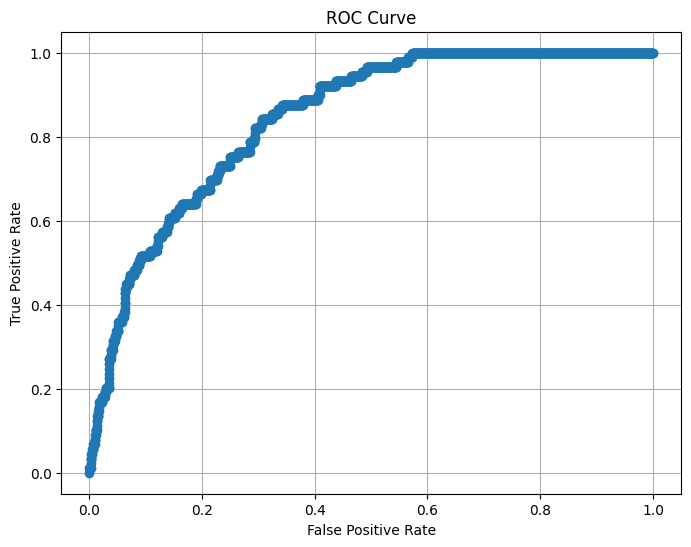

In [12]:
# Function to compute TPR, FPR, TNR, FNR
def compute_rates(y_true, y_probs, threshold):
    """
    Compute tpr, fpr, tnr, and fnr for a single threshold value
    :param y_true: a vector of true labels (0 or 1)
    :param y_probs: a vector of predicted probabilities of the positive class
    :param threshold: a threshold value (scalar between 0 and 1)
    :return: a list whose elements are TPR, FPR, TNR, FNR
    """
    # Compute predictions based on the threshold
    predictions = (y_probs >= threshold).astype(int)

    # Calculate true positives, false positives, true negatives, and false negatives
    TP = np.sum((predictions == 1) & (y_true == 1))  # True Positives
    FP = np.sum((predictions == 1) & (y_true == 0))  # False Positives
    TN = np.sum((predictions == 0) & (y_true == 0))  # True Negatives
    FN = np.sum((predictions == 0) & (y_true == 1))  # False Negatives

    # Compute the rates
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate
    FNR = FN / (TP + FN) if (TP + FN) > 0 else 0  # False Negative Rate

    return [TPR, FPR, TNR, FNR]

# Compute ROC Curve
def compute_roc_curve(y_true, y_probs):
    """
    Compute TPR and FPR for varying threshold values
    :param y_true: a vector of true labels (0 or 1)
    :param y_probs: a vector of predicted probabilities of the positive class
    :return: a tuple of lists, where the first list contains the tpr values and the second list contains the fpr values
    """
    thresholds = np.sort(np.unique(y_probs))  # Get unique thresholds
    tpr_list, fpr_list = [], []

    # Iterate through each threshold and compute rates
    for threshold in thresholds:
        tpr, fpr, _, _ = compute_rates(y_true, y_probs, threshold)  # Get TPR and FPR
        tpr_list.append(tpr)  # Append TPR to the list
        fpr_list.append(fpr)  # Append FPR to the list

    return tpr_list, fpr_list

# Call the compute_roc_curve function
#tpr_values, fpr_values = compute_roc_curve(y_true, y_probs)
tpr_values, fpr_values = compute_roc_curve(y_test, y_pred_probs)


# Print the results
print("Thresholds:", np.sort(np.unique(y_probs)))
print("TPR values:", tpr_values)
print("FPR values:", fpr_values)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, marker='o')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()


In [2]:
# Call the compute_roc_curve function and store the results
tpr, fpr = compute_roc_curve(y_true, y_probs)

# Print the results
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)


True Positive Rate (TPR): [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.8), np.float64(0.6), np.float64(0.4), np.float64(0.2)]
False Positive Rate (FPR): [np.float64(1.0), np.float64(0.8), np.float64(0.6), np.float64(0.4), np.float64(0.2), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


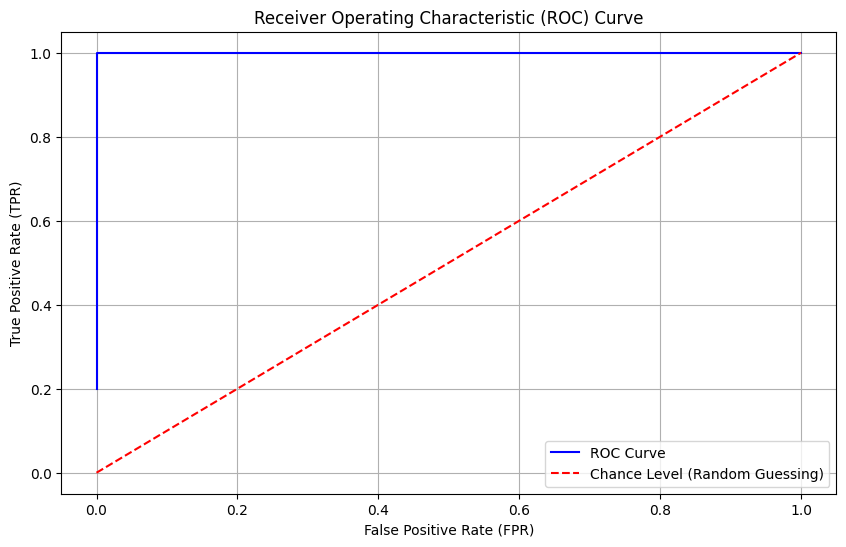

Area Under the ROC Curve (AUC): 1.0


/var/folders/g9/8jw7l6116kdd4pc549qnnz8r0000gn/T/ipykernel_13892/3442183015.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(tpr, fpr)


In [3]:
# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Chance Level (Random Guessing)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()

# Compute AUC using trapezoidal rule
# Make sure to sort the FPR and corresponding TPR values
fpr, tpr = zip(*sorted(zip(fpr, tpr)))

# Calculate the AUC
auc = np.trapz(tpr, fpr)
print("Area Under the ROC Curve (AUC):", auc)


In [4]:
def compute_pr(y_true, y_probs, threshold):
    """
    Compute precision and recall for a single threshold value.
    
    :param y_true: vector of true labels (0 or 1)
    :param y_probs: vector of predicted probabilities of the positive class
    :param threshold: a threshold value (scalar between 0 and 1)
    :return: a tuple containing the precision and recall values in first and second positions, respectively
    """
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_probs >= threshold).astype(int)

    # Compute True Positives (TP), False Positives (FP), False Negatives (FN)
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Prevent division by zero
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0  # Prevent division by zero

    return precision, recall


In [5]:
def compute_precision(y_true, y_probs, threshold):
    """
    Compute precision for a single threshold value.
    
    :param y_true: vector of true labels (0 or 1)
    :param y_probs: vector of predicted probabilities of the positive class
    :param threshold: a threshold value (scalar between 0 and 1)
    :return: precision value
    """
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_probs >= threshold).astype(int)

    # Compute True Positives (TP) and False Positives (FP)
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))

    # Calculate precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Prevent division by zero

    return precision

In [6]:
def compute_recall(y_true, y_probs, threshold):
    """
    Compute recall for a single threshold value.
    
    :param y_true: vector of true labels (0 or 1)
    :param y_probs: vector of predicted probabilities of the positive class
    :param threshold: a threshold value (scalar between 0 and 1)
    :return: recall value
    """
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_probs >= threshold).astype(int)

    # Compute True Positives (TP) and False Negatives (FN)
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FN = np.sum((y_pred == 0) & (y_true == 1))

    # Calculate recall
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0  # Prevent division by zero

    return recall


In [7]:
def compute_pr_curve(y_true, y_probs):
    """
    Compute precision and recall for varying threshold values.
    
    :param y_true: vector of true labels (0 or 1)
    :param y_probs: vector of predicted probabilities of the positive class
    :return: a tuple of lists, where the first list contains the precision values and the second list contains the recall values
    """
    thresholds = np.sort(np.unique(y_probs))
    precision_list, recall_list = [], []

    for threshold in thresholds:
        # Compute predictions based on the threshold
        y_pred = (y_probs >= threshold).astype(int)

        # Calculate True Positives, False Positives, and False Negatives
        TP = np.sum((y_pred == 1) & (y_true == 1))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Calculate precision and recall
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Prevent division by zero
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0  # Prevent division by zero

        # Append precision and recall to their respective lists
        precision_list.append(precision)
        recall_list.append(recall)

    return precision_list, recall_list


In [8]:
def compute_pr_curve(y_true, y_probs):
    """
    Compute precision and recall for varying threshold values.
    
    :param y_true: vector of true labels (0 or 1)
    :param y_probs: vector of predicted probabilities of the positive class
    :return: a tuple of lists, where the first list contains the precision values and the second list contains the recall values
    """
    thresholds = np.sort(np.unique(y_probs))
    precision_list, recall_list = [], []

    for threshold in thresholds:
        # Compute predictions based on the threshold
        y_pred = (y_probs >= threshold).astype(int)

        # Calculate True Positives, False Positives, and False Negatives
        TP = np.sum((y_pred == 1) & (y_true == 1))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Calculate precision and recall
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Prevent division by zero
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0  # Prevent division by zero

        # Append precision and recall to their respective lists
        precision_list.append(precision)
        recall_list.append(recall)

    return precision_list, recall_list


In [9]:
# Call the compute_pr_curve function and store the results
precision_values, recall_values = compute_pr_curve(y_test, y_pred_probs)  # Ensure y_test and y_pred_probs are defined


# Print the results
print("Precision values:", precision_values)
print("Recall values:", recall_values)


NameError: name 'y_pred_probs' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Plotting Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='o')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()



In [ ]:
from sklearn.metrics import average_precision_score

# Compute average precision
average_precision = average_precision_score(y_test, y_pred_probs)  # Ensure y_test and y_pred_probs are defined
print("Average Precision Score:", average_precision)


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

# Calculate AUC using your previously computed probabilities and true labels
roc_auc = roc_auc_score(y_test, y_pred_probs)  # AUC score
average_precision = average_precision_score(y_test, y_pred_probs)  # Average Precision score

# Print out the results
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", average_precision)
